---
Código para análise de dados do Experimento 1 de Laboratório de Física I

Feito pelo aluno

 Vinícius dos Passos de Souza

---



**Código para cálculo de MMQ($x$,$y$,$\sigma_y$)**

In [1]:
import numpy as np
def MMQ(x,y,ey):
  #SOMA Y/ERRO^2
  s1=0
  #SOMA X/ERRO^2
  s2=0
  #SOMA 1/ERRO^2
  s3=0
  #SOMA X*Y/ERRO^2
  s4=0
  #SOMA X^2/ERRO^2
  s5=0
  for i in range(len(y)):
      s1= (y[i])/((ey[i])**2)+s1
      s2 = (x[i])/((ey[i])**2)+s2
      s3= 1/((ey[i])**2)+s3
      s4= (x[i]*y[i])/((ey[i])**2)+s4
      s5 = ((x[i])**2)/((ey[i])**2)+s5
  v=(len(y))/s3
  v1=s5/s3
  v2=s2/s3
  a = (s1*s2-s3*s4)/(s2**2-s5*s3)

  return [a,(v/((v1-v2**2)*len(y)))**0.5, 
   (s1-a*s2)/(s3),(v*v1/((v1-v2**2)*len(y)))**0.5]
#Devolve lista com (coef. angular, erro coef. angular, coef linear, erro coef linear)

Teste de função para cálculo de MMQ, se temos reta com coeficiente angular 1 e coeficiente linear 0, com 10 pontos obtemos com esse MMQ.


In [3]:
from sklearn.linear_model import LinearRegression
x = [0,1,2,3,4,5,6,7,8,9]
y=[0,1,2,3,4,5,6,7,8,9]



ey = np.ones(len(y))
s = MMQ(x,y,ey)
print(f'Reta: y=({s[0]}+-{round(s[1],1)})x+({s[2]}+-{round(s[3],1)})')

Reta: y=(1.0+-0.1)x+(0.0+-0.6)


Código devolveu reta com mesmo coeficiente angular e linear, com incerteza relativamente próxima. Outros método que pode ser usado é com função Scipy, porém na busca de seguir o ajuste apresentados nos slides da disciplina foi seguido o MMQ.

**Adicionar os 
[DADOS](https://docs.google.com/spreadsheets/d/1CLpfpYSdI0fd9WszVqevz2mIBTUWz9jL9UcDiVNRv7E/edit?usp=sharing)**

Baixar essa planilha e adicionar para esse programa ler

In [ ]:
#ADicionar excel aqui e ler ele
import pandas as pd
excel = pd.ExcelFile('LAb1_EXP1.xlsx')

data = pd.read_excel(excel,'TABELAS')

In [ ]:
#Colocar os dados nas listas
import numpy as np
x = np.array(data['x (m)'].values)
ex = np.array(data['e_x'].values)

#medidas de t^2
t=[[],[],[],[],[],[]]
#erros de t^2
et=[[],[],[],[],[],[]]
#Puxando dados do excel para o programa
for i in range(len(t)):
  t[i]=data[f't{i+1}'].values
  et[i] = data[f'et{i+1}'].values


**Cacular coeficientes da reta feita de $x=at^2+b$**

In [ ]:
#Lista com coeficientes a, ea, b ,eb
c=[[],[],[],[],[],[]]

for i in range(0,len(t)):
  c[i]=MMQ(t[i],x,ex)
  print(f'Reta {i}: x = ({round(c[i][0], 4)}+-{round(c[i][1], 4)},4))t^2+({round(c[i][2], 4)}+-{round(c[i][3], 4)})')

Reta 0: x = (0.0849+-0.0001,4))t^2+(-0.0018+-0.0004)
Reta 1: x = (0.4308+-0.0005,4))t^2+(-0.0001+-0.0004)
Reta 2: x = (0.783+-0.0009,4))t^2+(0.0019+-0.0004)
Reta 3: x = (1.1254+-0.0013,4))t^2+(0.0027+-0.0004)
Reta 4: x = (0.5685+-0.0006,4))t^2+(0.0036+-0.0004)
Reta 5: x = (0.2569+-0.0003,4))t^2+(0.0008+-0.0004)


**Plotar gráfico de $x$ $(m)$ VS $t^2$ $(s^2)$**

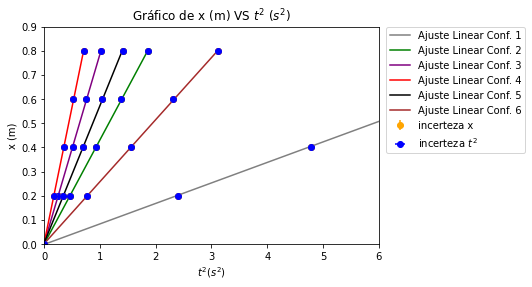

In [ ]:
import matplotlib.pyplot as plt

col = ['gray','green','purple','red','black','brown']

for i in range(len(t)):
  #plot dos pontos
  plt.plot(t[i],x,'o',color = col[i])
  #plot das retas
  plt.plot(t[i],t[i]*c[i][0]+c[i][2],'-',color = col[i],label = f'Ajuste Linear Conf. {i+1}')

#plot errorbar
for i in range(len(t)-1):
  plt.errorbar(t[i],x,yerr = ex,fmt='o',color = 'orange')
  plt.errorbar(t[i],x,xerr=et[i],fmt='o',color ='blue')
#colcoar legenda da error bar
plt.errorbar(t[i+1],x,yerr = ex,fmt='o',color = 'orange',label = 'incerteza x')
plt.errorbar(t[i+1],x,xerr=et[i+1],fmt='o',color = 'blue',label = 'incerteza $t^2$')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)#tirar se n quiser legenda
plt.ylim([0,0.9]) #arruma tamanho eixo y
plt.xlim([0,6]) #arrumar tamanho eixo x
plt.title('Gráfico de x (m) VS $t^2$ $(s^2)$')
plt.xlabel('$t^2$($s^2$)')
plt.ylabel('x (m)')
plt.show()

**Adicionar Massa do corpo suspenso $m$ e do total $M_T$**

In [ ]:
#TODAS AS MASSAS EM g
m=5.26 #massa original do corpo suspenso
em=0.01 #erro da massa original do corpo suspenso

Mt=286.45 #massa total dos 2 corpos
eMt=0.03 #erro da massa total dos 2 corpos

u=10.01 #massa adicionada ao corpo suspenso
eu=0.01 #incerteza da massa adicionado ao corpo suspenso

**Obter massas suspensas e acelerações calculadas com modelo teórico**

$a = \frac{mg}{2M_t}$

In [ ]:
#massa corpo suspenso no decorrer dos setups
mh= np.array([5.26,(5.26+2*u),(5.26+4*u),(5.26+6*u),(5.26+3*u),(5.26+1*u)])
emh = np.array([0.01,(np.sqrt(0.01**2+(2*0.01)**2)),(np.sqrt(0.01**2+(4*0.01)**2)),(np.sqrt(0.01**2+(6*0.01)**2)),
                (np.sqrt(0.01**2+(3*0.01)**2)),(np.sqrt(0.01**2+(0.01)**2))])

#aceleração calculada com modelo teórico
for i in range(len(t)):
  print(f'a_{i} = \({round(mh[i]*9.8/(2*Mt),4)}\pm {round(9.8/2*np.sqrt(emh[i]**2/Mt**2+mh[i]**2*eMt**2/Mt**4),4)}\)')

a_0 = \(0.09\pm 0.0002\)
a_1 = \(0.4324\pm 0.0004\)
a_2 = \(0.7749\pm 0.0007\)
a_3 = \(1.1174\pm 0.001\)
a_4 = \(0.6037\pm 0.0005\)
a_5 = \(0.2612\pm 0.0002\)


---
---
---
**Associação com Gravidade**

PAra isso tentarei plotar um gráfico no formato $a=C\frac{m}{Mt}$ (o $C$ deve dar metade da gravidade).

In [ ]:
#acelerações
a=np.ones(len(t))
ea=np.ones(len(t))

for i in range(len(t)):
  a[i]=c[i][0]
  ea[i]=c[i][1]
  #print(f'\({a[i]} \pm {ea[i]}\) ') #para ver tabela
print('-')
#G seria os valores de mh/Mt
G = np.ones(len(t))
eG = np.ones(len(t))
for i in range(len(t)):
  G[i]=mh[i]/Mt
  eG[i] = np.sqrt( (emh[i]/Mt)**2 + (eMt*mh[i]/(Mt**2))**2 )
  #print(f'\( {G[i]}\pm{eG[i]}\)') #printe se quiser fazer tabela 

#MMQ
J = MMQ(G,a,ea)
print(f'C=({round(J[0],3)}+- {round(J[1],3)})')
print(f'0={round(J[2],4)}+-{round(J[3],4)}')
print(f'g = ({round(J[0]*2,3)}+- {round(J[1]*(2),3)})m/s^2')

-
C=(4.88+- 0.003)
0=-0.0047+-0.0001
g = (9.761+- 0.006)m/s^2


**Plotar o gráfico de $a$ por $\frac{m}{Mt}$**

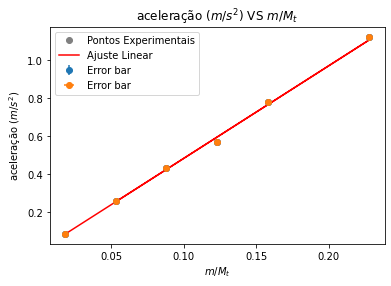

In [ ]:
plt.plot(G,a,'o',color = 'gray',label = 'Pontos Experimentais')
plt.plot(G,G*J[0]+J[2],'-',color = 'red', label = 'Ajuste Linear')

plt.errorbar(G, a,yerr=ea,fmt='o', label = 'Error bar')
plt.errorbar(G, a, xerr=eG,fmt='o', label = 'Error bar')        


#plt.ylim([0,0.75])
#plt.xlim([-0.0005,0.0708])
plt.legend()
plt.title('aceleração ($ m/s^2$) VS $m/M_t$ ')
plt.ylabel('aceleração ($m/s^2$)')
plt.xlabel('$ m/M_t$')
plt.show()

---
---
---
**Calcular forças e Acelerações**

Erro da força calculado usando propagação de Erro
$\sigma_F = \pm g\sqrt{\sigma_m^2 + \left( \sigma_{added mass}\right)^2 }$

In [ ]:
g=9.8

#definindo forças
F= mh*g*10**(-3)
eF= emh*g*10**(-3)

for i in range(len(t)):
  print(f'F(N) = {round(F[i],4)}+-{round(eF[i],4)}')
for i in range(len(t)):
  print(f'a(m/s^2) = {round(a[i],4)}-+{round(ea[i],4)}')

F(N) = 0.0515+-0.0001
F(N) = 0.2477+-0.0002
F(N) = 0.4439+-0.0004
F(N) = 0.6401+-0.0006
F(N) = 0.3458+-0.0003
F(N) = 0.1496+-0.0001
a(m/s^2) = 0.0849-+0.0001
a(m/s^2) = 0.4308-+0.0005
a(m/s^2) = 0.783-+0.0009
a(m/s^2) = 1.1254-+0.0013
a(m/s^2) = 0.5685-+0.0006
a(m/s^2) = 0.2569-+0.0003


**Conseguir Reta(MMQ)**

In [ ]:
C = MMQ(a,F,eF)
print(f'Reta: F = ({round(C[0],4)}+- {round(C[1],4)})a + ({round(C[2],4)} +-{round(C[3],4)})')
print(f'Massa total = {round(C[0]/2,4)}+-{round(C[1]/2,4)}')

Reta: F = (0.5738+- 0.0003)a + (0.003 +-0.0001)
Massa total = 0.2869+-0.0002


**Plotar Gráfico de $F$ $(N)$ VS $a$ $ \left (\frac{m}{s^2} \right )$**

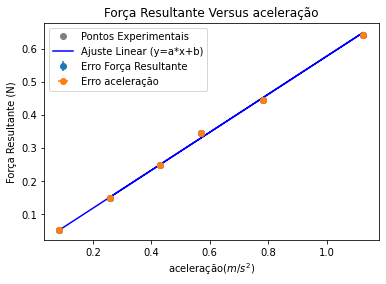

In [ ]:
plt.plot(a,F,'o',color = 'gray')
plt.plot(a,a*C[0]+C[2],'-',color = 'blue')

plt.errorbar(a, F, yerr=eF,fmt='o')
plt.errorbar(a, F, xerr=ea,fmt='o')        
plt.legend(['Pontos Experimentais','Ajuste Linear (y=a*x+b)','Erro Força Resultante','Erro aceleração'])

#plt.ylim([0,0.75])
#plt.xlim([-0.0005,0.0708])
plt.title('Força Resultante Versus aceleração')
plt.xlabel('aceleração($m/s^2$)')
plt.ylabel('Força Resultante (N)')
plt.show()

---
---
---
---
---

**Plot gráfico do apendice**

Reta 0: x = (0.0921+-0.0001)t^2+(0.001+-0.0004)
Reta 1: x = (0.1125+-0.0001)t^2+(0.0014+-0.0004)
Reta 2: x = (0.1575+-0.0002)t^2+(0.002+-0.0004)
Reta 3: x = (0.2443+-0.0003)t^2+(0.0025+-0.0004)
Reta 4: x = (0.4675+-0.0005)t^2+(0.0034+-0.0004)


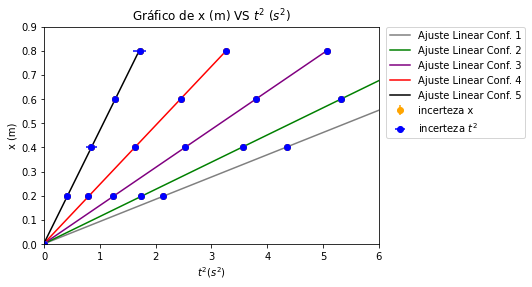

In [ ]:
excel =pd.ExcelFile('Copia de LAb1_EXP1.xlsx')
data = pd.read_excel(excel,'TABELAS')
#Colocar os dados nas listas
import numpy as np
x = np.array(data['x (m)'].values)
ex = np.array(data['e_x'].values)

#medidas de t^2
t=[[],[],[],[],[]]
#erros de t^2
et=[[],[],[],[],[]]
#Puxando dados do excel para o programa
for i in range(len(t)):
  t[i]=data[f't{i+1}'].values
  et[i] = data[f'et{i+1}'].values
#Lista com coeficientes a, ea, b ,eb
o=[[],[],[],[],[],[]]

for i in range(0,len(t)):
  o[i]=MMQ(t[i],x,ex)
  print(f'Reta {i}: x = ({round(o[i][0],4)}+-{round(o[i][1],4)})t^2+({round(o[i][2],4)}+-{round(o[i][3],4)})')

col = ['gray','green','purple','red','black','brown']

for i in range(len(t)):
  #plot dos pontos
  plt.plot(t[i],x,'o',color = col[i])
  #plot das retas
  plt.plot(t[i],t[i]*o[i][0]+o[i][2],'-',color = col[i],label = f'Ajuste Linear Conf. {i+1}')

#plot errorbar
for i in range(len(t)-1):
  plt.errorbar(t[i],x,yerr = ex,fmt='o',color = 'orange')
  plt.errorbar(t[i],x,xerr=et[i],fmt='o',color ='blue')
#colcoar legenda da error bar
plt.errorbar(t[i+1],x,yerr = ex,fmt='o',color = 'orange',label = 'incerteza x')
plt.errorbar(t[i+1],x,xerr=et[i+1],fmt='o',color = 'blue',label = 'incerteza $t^2$')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)#tirar se n quiser legenda
plt.ylim([0,0.9]) #arruma tamanho eixo y
plt.xlim([0,6]) #arrumar tamanho eixo x
plt.title('Gráfico de x (m) VS $t^2$ $(s^2)$')
plt.xlabel('$t^2$($s^2$)')
plt.ylabel('x (m)')
plt.show()